In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

In [13]:

df = pd.read_csv('Circulatory_SpiderVeins.csv')
df.head()

,City,State,Zip,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,...,Aspergillus ustus,Cladosporium cladosporioides 1,Cladosporium cladosporioides 2,Cladosporium herbarum,Epicoccum nigrum,Mucor amphibiorum*,Penicillium chrysogenum,Rhizopus stolonifer,ERMI Score (Group I - Group II),Circulatory_spiderveins
0,Mountain Brook,Alabama,35223,0,0,14,0,0,11,0,...,15,0,0,0,372,10,29,6,9.20,0
1,Wasilla,Alaska,99623,0,0,12,0,5,0,0,...,0,470,12,114,67,24,111,0,2.50,0
2,Soldotna,Alaska,99669-8654,0,3,3,234,0,6,0,...,119,0,0,0,60,173,70,0,6.40,1
3,Soldotna,Alaska,99669,0,0,0,0,0,0,0,...,0,0,0,0,435,4,49,0,0.10,0
4,Anchorage,Alaska,99508-4014,64,5,32,0,0,6,0,...,0,0,0,0,2,7,83,12,5.83,1


In [14]:
df = df.drop('Zip',axis=1)

In [15]:
# Determine the index of the "ERMI Score (Group I - Group II)" column
mold_start_index = df.columns.get_loc("Aspergillus flavus/oryzae")
mold_end_index = df.columns.get_loc("ERMI Score (Group I - Group II)")
print(f" mold start index {mold_start_index} and end index {mold_end_index}")

 mold start index 2 and end index 38


In [16]:
columns_to_scale = df.columns[mold_start_index:mold_end_index+1]

In [17]:
scaler = StandardScaler()

In [18]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [19]:
df

,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,...,Aspergillus ustus,Cladosporium cladosporioides 1,Cladosporium cladosporioides 2,Cladosporium herbarum,Epicoccum nigrum,Mucor amphibiorum*,Penicillium chrysogenum,Rhizopus stolonifer,ERMI Score (Group I - Group II),Circulatory_spiderveins
0,Mountain Brook,Alabama,-0.104428,-0.073751,-0.346139,-0.055444,-0.068028,-0.158983,-0.101535,-0.084850,...,-0.102294,-0.379544,-0.262792,-0.196048,-0.079527,-0.280090,-0.146347,-0.087049,-0.041578,0
1,Wasilla,Alaska,-0.104428,-0.073751,-0.348158,-0.055444,-0.067795,-0.198118,-0.101535,-0.084850,...,-0.183754,-0.239406,-0.185881,-0.160027,-0.092169,-0.243129,-0.115790,-0.144003,-0.041614,0
2,Soldotna,Alaska,-0.104428,-0.072315,-0.357242,0.052017,-0.068028,-0.176772,-0.101535,-0.078989,...,0.462494,-0.379544,-0.262792,-0.196048,-0.092459,0.150244,-0.131069,-0.144003,-0.041593,1
3,Soldotna,Alaska,-0.104428,-0.073751,-0.360270,-0.055444,-0.068028,-0.198118,-0.101535,-0.084850,...,-0.183754,-0.379544,-0.262792,-0.196048,-0.076916,-0.295931,-0.138894,-0.144003,-0.041627,0
4,Anchorage,Alaska,0.392251,-0.071357,-0.327971,-0.055444,-0.068028,-0.176772,-0.101535,-0.084850,...,-0.183754,-0.379544,-0.262792,-0.196048,-0.094864,-0.288011,-0.126224,-0.030095,-0.041596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,-0.104428,-0.073272,-0.329990,-0.042126,-0.068028,-0.148310,-0.089214,-0.084850,...,-0.178324,-0.379544,-0.262792,-0.196048,-0.089558,-0.303851,0.032897,-0.144003,-0.041570,0
577,Shorewood,Wisconsin,-0.019061,-0.066090,-0.188682,-0.052689,-0.068028,-0.006001,-0.092294,0.173027,...,-0.162032,-0.379544,-0.262792,-0.196048,-0.053911,-0.280090,-0.126970,-0.144003,-0.041526,0
578,Waukesha,Wisconsin,-0.065625,-0.066090,-0.046364,-0.043045,-0.068028,-0.191003,-0.073812,-0.084850,...,0.011749,-0.379544,-0.262792,-0.196048,0.125234,-0.206168,0.065318,-0.144003,-0.041571,0
579,Laramie,Wyoming,-0.081146,-0.070399,-0.209878,-0.055444,-0.064762,-0.198118,-0.101535,-0.084850,...,-0.183754,0.681038,-0.153834,4.266404,0.028325,-0.219368,-0.149701,-0.125018,-0.041615,0


In [20]:
df.dtypes

City                                 object
State                                object
Aspergillus flavus/oryzae           float64
Aspergillus fumigatus               float64
Aspergillus niger                   float64
Aspergillus ochraceus               float64
Aspergillus penicillioides          float64
Aspergillus restrictus*             float64
Aspergillus sclerotiorum            float64
Aspergillus sydowii                 float64
Aspergillus unguis                  float64
Aspergillus versicolor              float64
Aureobasidium pullulans             float64
Chaetomium globosum                 float64
Cladosporium sphaerospermum         float64
Eurotium (Asp.) amstelodami*        float64
Paecilomyces variotii               float64
Penicillium brevicompactum          float64
Penicillium corylophilum            float64
Penicillium crustosum*              float64
Penicillium purpurogenum            float64
Penicillium spinulosum*             float64
Penicillium variabile           

Above is the normalization of the values .We will now Update the csv file

In [22]:
df.to_csv('Circulatory_SpiderVeins.csv')

<Axes: xlabel='Circulatory_spiderveins', ylabel='Density'>

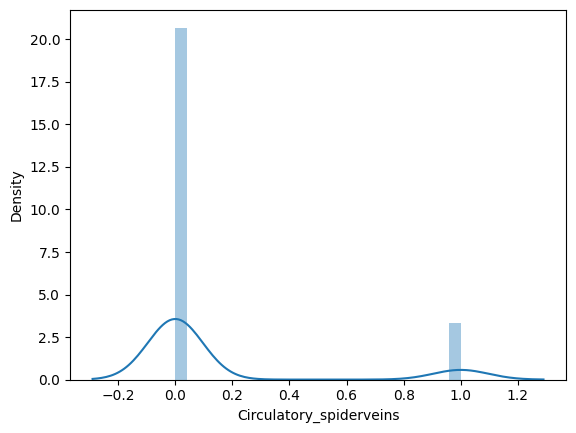

In [66]:
sns.distplot(df['Circulatory_spiderveins']) 

MODELING : Random Forest

Splitting the data into training and testing sets

In [82]:
y= df['Circulatory_spiderveins']
X= df.drop(columns= ['Circulatory_spiderveins','City', 'State'], axis=1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [84]:
X_train.head()

,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,Aspergillus unguis,Aspergillus versicolor,...,Alternaria alternata,Aspergillus ustus,Cladosporium cladosporioides 1,Cladosporium cladosporioides 2,Cladosporium herbarum,Epicoccum nigrum,Mucor amphibiorum*,Penicillium chrysogenum,Rhizopus stolonifer,ERMI Score (Group I - Group II)
478,0.229279,-0.069921,-0.218962,-0.055444,-0.068028,0.061596,-0.092294,-0.084850,-0.208728,-0.140020,...,-0.018835,-0.118586,-0.379544,-0.262792,-0.196048,-0.049808,-0.163926,-0.150446,-0.144003,-0.041541
25,-0.019061,-0.069921,-0.290625,-0.055444,-0.042878,-0.173214,-0.092294,-0.084850,-0.208728,-0.146772,...,-0.073557,-0.183754,1.068656,-0.243565,-0.136646,-0.040067,-0.261610,-0.144857,-0.144003,-0.041577
515,-0.057864,-0.073751,-0.273466,-0.055444,-0.068028,-0.198118,-0.089214,-0.084850,-0.208728,-0.146772,...,0.032572,-0.183754,-0.379544,-0.262792,-0.196048,-0.069289,-0.298571,-0.156409,-0.144003,-0.041601
569,-0.104428,-0.070878,-0.328980,-0.055444,-0.068028,-0.176772,-0.101535,-0.084850,-0.208728,-0.138613,...,-0.255966,-0.183754,-0.379544,-0.262792,-0.196048,-0.094035,-0.301211,-0.155291,-0.134511,-0.043576
488,-0.042343,-0.061302,-0.265392,0.031810,-0.002703,7.984657,-0.064571,-0.048513,-0.145080,0.128952,...,1.898113,-0.162032,2.393416,0.442231,-0.113896,0.079142,0.300729,-0.121007,-0.049079,-0.041513


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [86]:
print('Begin Random Forest Implementation...')

rf_20_model=RandomForestClassifier(criterion='entropy', n_estimators=20)
rf_20_model.fit(X_train, y_train)
rf_20_predictions=rf_20_model.predict_proba(X_test)[:,1].tolist()

rf_100_model=RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_100_model.fit(X_train, y_train)
rf_100_predictions=rf_100_model.predict_proba(X_test)[:,1].tolist()

print('End')

Begin Random Forest Implementation...
End


Evaluation

In [88]:
print('Computing ROC Curve...')

fpr_20, tpr_20, thresholds_20=roc_curve(y_test, rf_20_predictions)
fpr_100, tpr_100, thresholds_100=roc_curve(y_test, rf_100_predictions)

print('End')


Computing ROC Curve...
End


Plotting ROC Curve...


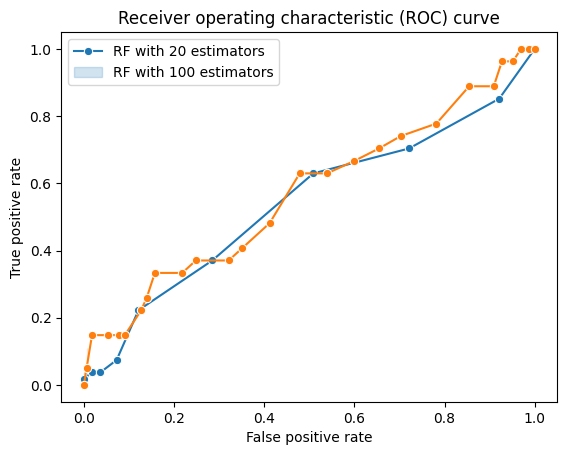

In [89]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [90]:
auc_20=auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

auc_100=auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))

AUC of the RF model with 20 estimators is 0.541
AUC of the RF model with 100 estimators is 0.568


MODELING : Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [101]:
feature_list=df.select_dtypes(include=['float64']).columns.tolist()

In [102]:
ylr=df['Circulatory_spiderveins']
Xlr=df[feature_list]

print("Number of examples: " + str(Xlr.shape[0]))
print("\nNumber of Features:" + str(Xlr.shape[1]))
print(str(list(Xlr.columns)))

Number of examples: 581

Number of Features:37
['Aspergillus flavus/oryzae', 'Aspergillus fumigatus', 'Aspergillus niger', 'Aspergillus ochraceus', 'Aspergillus penicillioides', 'Aspergillus restrictus*', 'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis', 'Aspergillus versicolor', 'Aureobasidium pullulans', 'Chaetomium globosum', 'Cladosporium sphaerospermum', 'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii', 'Penicillium brevicompactum', 'Penicillium corylophilum', 'Penicillium crustosum*', 'Penicillium purpurogenum', 'Penicillium spinulosum*', 'Penicillium variabile', 'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum', 'Stachybotrys chartarum', 'Trichoderma viride*', 'Wallemia sebi', 'Acremonium strictum', 'Alternaria alternata', 'Aspergillus ustus', 'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2', 'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor amphibiorum*', 'Penicillium chrysogenum', 'Rhizopus stolonifer', 'ERMI Score

In [103]:
Xlr_train, Xlr_test, ylr_train, ylr_test=train_test_split(Xlr,ylr,test_size=.33,random_state=1234)

In [105]:

modellr=LogisticRegression()

modellr.fit(Xlr_train, ylr_train)

probability_predictionslr=modellr.predict_proba(Xlr_test)
df_print = pd.DataFrame(probability_predictionslr, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

l_loss= log_loss(ylr_test,probability_predictionslr)
print('Log loss: ' + str(l_loss))

class_label_predictionslr=modellr.predict(Xlr_test)
print('Class labels: ' + str(class_label_predictionslr[0:5]))

acc_scorelr=accuracy_score(y_test, class_label_predictionslr)
print('Accuracy: ' + str(acc_scorelr))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.878221     0.121779
     0.867655     0.132345
     0.890056     0.109944
     0.915669     0.084331
     0.870827     0.129173
Log loss: 0.4782280894764523
Class labels: [0 0 0 0 0]
Accuracy: 0.84375


In [106]:
print(modellr.classes_)

[0 1]


In [107]:
def computeAccuracy(threshold_value):
    
    labels=[]
    for p in probability_predictionslr[:,0]:
        if p >= threshold_value:
            labels.append(False)
        else:
            labels.append(True)
    
    acc_scorelr = accuracy_score(ylr_test, labels)
    return acc_scorelr


In [108]:
thresholds = [0.44, 0.50, 0.55, 0.67, 0.75]
for t in thresholds:
    print("Threshold value {:.2f}: Accuracy {}".format(t, str(computeAccuracy(t))))

Threshold value 0.44: Accuracy 0.8489583333333334
Threshold value 0.50: Accuracy 0.84375
Threshold value 0.55: Accuracy 0.84375
Threshold value 0.67: Accuracy 0.84375
Threshold value 0.75: Accuracy 0.828125


In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [115]:
print('Begin GBDT Implementation...')

gbdt_2_model=GradientBoostingClassifier(n_estimators = 50, max_depth = 2)
gbdt_2_model.fit(X_train, y_train)
gbdt_2_predictions=gbdt_2_model.predict_proba(X_test)[:,1].tolist()
gbdt_10_model=GradientBoostingClassifier(n_estimators = 50, max_depth = 10)
gbdt_10_model.fit(X_train, y_train)
gbdt_10_predictions=gbdt_10_model.predict_proba(X_test)[:,1].tolist()

print('End')

Begin GBDT Implementation...
End


In [116]:
print('Computing ROC Curve...')

fpr_2, tpr_2, thresholds_2=roc_curve(y_test, gbdt_2_predictions)

fpr_10, tpr_10, thresholds_10=roc_curve(y_test, gbdt_10_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


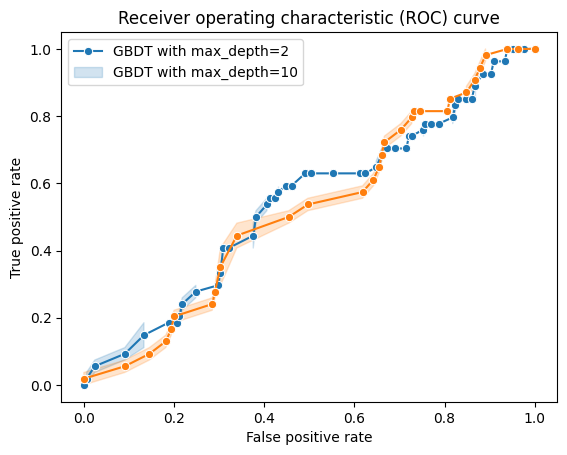

In [117]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_2, y=tpr_2, marker = 'o')
sns.lineplot(x=fpr_10, y=tpr_10, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2', 'GBDT with max_depth=10'])
plt.show()


In [118]:
auc_2=auc(fpr_2,tpr_2)

print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_2))

auc_10=auc(fpr_10,tpr_10)

print("AUC of the GBDT model with a max depth of 10 is {:.3f}".format(auc_10))

AUC of the GBDT model with a max depth of 2 is 0.540
AUC of the GBDT model with a max depth of 10 is 0.522


In [125]:
#Making A Predictive System

input_data=(-0.08114576435597365,-0.0632175949139538,-0.18767216226616454,-0.05452561284851983,-0.06802796616484484,-0.1981183325854696,-0.10153538977051944,-0.08485031422751203,-0.20872826902615105,-0.12932867619512287,-0.14364248444692906,-0.1271167314979789,-0.1594168448401747,-0.23532823573402126,-0.07033490844531844,-0.09028480974901987,-0.1962334155783447,-0.13933386552622135,-0.08590028508552056,-0.11898923464049968,-0.2827801822041785,-0.14620961213302064,-0.04158034578056344,-0.09058979826467912,-0.1567123305379791,-0.15003503100869697,-0.1792493035822759,-0.25264901352571134,-0.17289295669709073,-0.3795444811333806,-0.2627924345097832,-0.1960480539413681,-0.09436615520193255,-0.22728856855764748,-0.14821059175318627,-0.14400323850916902,-0.04157791780320965)
input_data_as_nparray = np.asarray(input_data) 
reshaped_input_data= input_data_as_nparray.reshape(1,-1)
prediction_of_input_rf = rf_100_model.predict(reshaped_input_data)
prediction_of_input_lr = modellr.predict(reshaped_input_data)
prediction_of_input_gbdt = gbdt_2_model.predict(reshaped_input_data)

print(prediction_of_input_rf)
print(prediction_of_input_lr)
print(prediction_of_input_gbdt)

[1]
[0]
[0]
